# 汽轮机调节级热力计算：

已知调节级

* 进口压力 $p1=16.0MPa$ ，进口主汽温 $t1=537℃$，

* 出口压力 $p2=11.75MPa$ ，出口汽温 $t2=483.8℃$

求调节级的效率并画出热力过程线。

整个代码由基本三个模块组成：

* **主函数** 定义进出口各项参数的字典，调用辅助模块完成计算


* **CylinderEff**  效率计算


* **CylinderPlot** 画出热力过程线


计算中水蒸气参数计算采用老师已做好的seuif97共享包

### CylinderEff函数
  
   已知进出口P,T在此函数中计算出其他各项参数
  
  （注：水蒸气参数计算采用老师已做好的seuif97库）并由实际焓降与理想焓降的比值算出调节级效率，
  
  效率计算公式
  
  $\mu=\frac{h1-h2}{h1-h2s}$ 

In [1]:
# -*- coding: utf-8 -*-

import seuif97 as if97

def CylinderEff(cylinder):
    """simple function  for cylinde using 'dict' """

    cylinder['inlet']['h'] = if97.pt2h(cylinder['inlet']['p'], cylinder['inlet']['t'])
    cylinder['inlet']['s'] = if97.pt2s(cylinder['inlet']['p'], cylinder['inlet']['t'])

    cylinder['outlet']['h'] = if97.pt2h(cylinder['outlet']['p'], cylinder['outlet']['t'])
    cylinder['outlet']['s'] = if97.pt2s(cylinder['outlet']['p'], cylinder['outlet']['t'])

    # h2s is the specific enthalpy at state 2 for the isentropic turbine
    h2s = if97.ps2h(cylinder['outlet']['p'], cylinder['inlet']['s'])
    
    cylinder['h2s'] = h2s
     
    hds = cylinder['inlet']['h'] - h2s   # isentropic specific enthalpy drop 等熵
    hd  = cylinder['inlet']['h'] - cylinder['outlet']['h']  # specific enthalpy drop 实际

    cylinder['ef'] = 100 * hd / hds

    return cylinder


### CylinderPlot函数

 用于画出热力过程线。画出了等压p1,p2、等熵、实际热力过程四条曲线。

In [6]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np

import seuif97 as if97

def CylinderPlot(cylinder):
    """  visual steam expansion line in cylinder  """

    # 4条线：p1、p2 等压，等熵焓降线、膨胀线

    p1 = cylinder['inlet']['p']
    t1 = cylinder['inlet']['t']
    s1 = cylinder['inlet']['s']
    h1 = cylinder['inlet']['h']
    
    p2 = cylinder['outlet']['p']
    t2 = cylinder['outlet']['t']
    s2 = cylinder['outlet']['s']
    h2 = cylinder['outlet']['h']
    
    ef = cylinder['ef']
    
    hs = cylinder['h2s']
    
    samp = 0.01
     
    smp1  = s1 - samp
    hsmp1 = if97.ps2h(p1, smp1)
    sap1  = s1 + samp
    hsap1 = if97.ps2h(p1, sap1)

    smt1  = s1 - samp
    hsmt1 = if97.ps2h(p1, smp1)
    sat1  = s1 + samp
    hsat1 = if97.ts2h(t1, sap1)
    
     # 1 p1等压
    point_p1_h    = np.zeros(shape=3)
    point_p1_h[0] = hsmp1
    point_p1_h[1] = h1
    point_p1_h[2] = hsap1
    point_p1_s    = np.zeros(shape=3)
    point_p1_s[0] = smp1
    point_p1_s[1] = s1
    point_p1_s[2] = sap1

    # 2 p2 等压
    smp2  = s1 - samp  # 等熵焓降点延伸
    hsmp2 = if97.ps2h(p2, smp2)
    sap2  = s2 + samp
    hsap2 = if97.ps2h(p2, sap2)

    smt2  = s2 - samp
    hsmt2 = if97.ps2h(p1, smp1)
    sat2  = s2 + samp
    hsat2 = if97.ts2h(t2, sap1)

    point_p2_h    = np.zeros(shape=3)
    point_p2_h[0] = hsmp2
    point_p2_h[1] = h2
    point_p2_h[2] = hsap2

    point_p2_s    = np.zeros(shape=3)
    point_p2_s[0] = smp2
    point_p2_s[1] = s2
    point_p2_s[2] = sap2

    # 3 等熵焓降
    point_is_h    = np.zeros(shape=2)
    point_is_h[0] = h1
    point_is_h[1] = hs
    point_is_s    = np.zeros(shape=2)
    point_is_s[0] = s1
    point_is_s[1] = s1

    # 4 HP Expansion Line
    point_hp_h    = np.zeros(shape=2)
    point_hp_h[0] = h1
    point_hp_h[1] = h2
    point_hp_s    = np.zeros(shape=2)
    point_hp_s[0] = s1
    point_hp_s[1] = s2

    plt.plot(point_p1_s, point_p1_h, 'bs-')

    plt.plot(point_p2_s, point_p2_h, 'bs-')
    plt.plot(point_is_s, point_is_h, 'ys-', label='IS Expansion Line')
    plt.plot(point_hp_s, point_hp_h, 'rs-', label='HP Expansion Line')
    plt.minorticks_on()
    
    _title = 'The isentropic efficiency = ' + \
    r'$\frac{h1-h2}{h1-h2s}$' + '=' + '{:.2f}'.format(ef) + '%'
    plt.legend(loc="best", bbox_to_anchor=[0.5, 0.5],
           ncol=2, shadow=True, title=_title)

    # annotate some interesting points using the annotate command
    plt.annotate('(P1,T1)',
             xy=(s1, h1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    plt.annotate('(P2,T2)',
             xy=(s2, h2), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    plt.xlabel('s(kJ/(kg.K))')
    plt.ylabel('h(kJ/kg)')
    plt.show()


### 主函数 

定义进出口各项参数的字典，调用辅助模块完成计算

The isentropic efficiency = 94.97224372469898 %


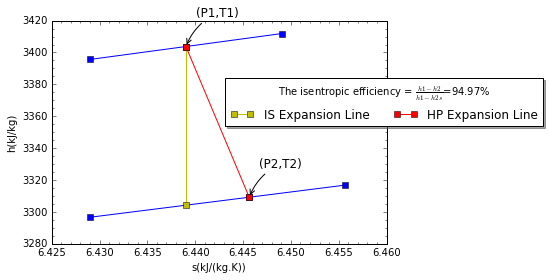

In [7]:
# -*- coding: utf-8 -*-
%matplotlib inline 

hp = {'inlet':{}, 'outlet':{}, 'ef':None}
minlet = {'p': 16, 't': 537, 'h': 0, 's': 0}
moutlet = {'p': 11.75, 't': 483.8, 'h': 0, 's': 0}
hp['inlet'] = dict(minlet)
hp['outlet'] = dict(moutlet)

hp= CylinderEff(hp)
print('The isentropic efficiency =', hp['ef'], '%')

CylinderPlot(hp)


## 小结

与作业七灵活运用列表不同，此次作业大量使用了字典，字典在python的学习中是相当重要的。

与我们平时汽轮机计算的最大不同是，热力性能参数均是通过公式定义的，而不再依赖于计算查表等比较过时的手段。

目前有些专业课程过于陈旧，应当推陈出新，计算机应是最基本的计算工具，程序化计算应是基本计算手段。